Jesus Sierralaya

# Predict the price range of a group of mobile phones

In [1]:
# Supress info messages
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Load csv from github 

In [2]:
url = 'https://raw.githubusercontent.com/mcstllns/DeepLearning/main/phone_price_classification_train.csv'
df = pd.read_csv(url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


We observe more information about the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Define function to draw the history

In [4]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['val_loss'],'b',
           label = 'Validation Error')
  plt.legend()
  plt.show()

## Preprocess

In [5]:
X = df.drop('price_range', axis=1)  # Drop the col 'y
y = df['price_range']  # Target

# Using the train_test_split function from sklearn lib
# random_state for make the answer reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Normalize the data
scaler = StandardScaler()
# mean 0 variance 1
X_train = scaler.fit_transform(X_train)
# using the same mean and sd than the train
X_test = scaler.transform(X_test)

## Create the Neural Network Model

In [6]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax') 
])

model.compile(optimizer='adam',              
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1000, 
                    validation_split=0.2, verbose=0)

## Evaluate the model

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

13/13 [==============================] - 0s 751us/step - loss: 0.2115 - accuracy: 0.9075
Test accuracy: 0.9075000286102295, Test loss: 0.2115052193403244


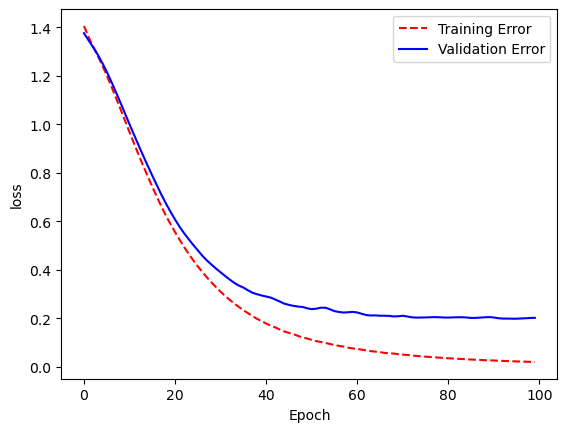

In [9]:
plot_history(history)